# 🏠 House Price Prediction: Advanced Regression Analysis

## Executive Summary

This project builds and compares multiple regression models to predict residential property prices. We demonstrate advanced techniques including regularization, ensemble methods, and thorough model evaluation.

**Business Goal:** Develop an accurate price prediction model to help real estate agents, buyers, and sellers make data-driven decisions.

**Models Evaluated:**
- Linear Regression (Baseline)
- Ridge Regression (L2 Regularization)
- Lasso Regression (L1 Regularization)
- ElasticNet (Combined L1/L2)
- Random Forest Regressor
- Gradient Boosting Regressor
- XGBoost Regressor

**Success Metrics:**
- R² Score (explained variance)
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- MAPE (Mean Absolute Percentage Error)

---

**Author:** Alexy Louis  
**Date:** December 2024  
**Contact:** alexy.louis.scholar@gmail.com

## 1. Setup and Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Sklearn - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer

# Sklearn - Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Sklearn - Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
np.random.seed(42)

# Visualization style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Custom colors
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'success': '#27AE60',
    'danger': '#E74C3C',
    'warning': '#F39C12',
    'info': '#17A2B8'
}

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# Load the dataset
df = pd.read_csv('data/housing_prices.csv')

print(f"Dataset loaded: {df.shape[0]:,} properties × {df.shape[1]} columns")
print(f"\nPrice Statistics:")
print(f"   Min: ${df['Price'].min():,}")
print(f"   Max: ${df['Price'].max():,}")
print(f"   Mean: ${df['Price'].mean():,.0f}")
print(f"   Median: ${df['Price'].median():,.0f}")

Dataset loaded: 3,000 properties × 23 columns

Price Statistics:
   Min: $44,000
   Max: $1,322,500
   Mean: $359,233
   Median: $332,000


In [3]:
# First look at the data
df.head(10)

,PropertyID,Neighborhood,PropertyType,SquareFeet,Bedrooms,Bathrooms,YearBuilt,PropertyAge,LotSize,GarageCapacity,HasPool,HasFireplace,RenovationYear,YearsSinceRenovation,Condition,EnergyRating,SchoolRating,CrimeRate,DistanceToCenter,HOAFee,DaysOnMarket,ListingDate,Price
0,PROP_000001,Suburbs,Townhouse,833.00,1,1.50,2002,22,0.39,2,0,1,0,22,8.80,E,8.00,4,11.80,154,3,2024-09-04,169000
1,PROP_000002,Residential Park,Townhouse,1365.00,3,2.00,2011,13,0.35,2,0,1,0,13,8.90,A,8.00,6,11.30,270,120,2024-06-25,408000
2,PROP_000003,University Area,Single Family,1545.00,3,3.50,1984,40,0.07,2,0,1,2019,5,9.70,D,5.00,23,7.60,0,9,2024-09-23,402000
3,PROP_000004,Historic District,Condo,1187.00,2,2.50,2008,16,0.00,3,0,0,2015,9,10.00,F,6.00,15,2.10,503,10,2024-10-13,508000
4,PROP_000005,Midtown,Condo,662.00,3,2.00,2005,19,0.00,1,0,0,2001,23,9.40,E,8.00,16,2.20,366,54,2024-07-30,267000
5,PROP_000006,Midtown,Multi-Family,2020.00,4,4.00,2021,3,0.36,2,0,0,0,3,9.50,A,7.00,21,3.80,0,39,2024-09-16,549000
6,PROP_000007,Downtown,Ranch,1053.00,2,1.00,1965,59,1.90,2,0,1,0,59,7.30,E,7.00,21,0.10,0,104,2024-07-04,320000
7,PROP_000008,Industrial,Single Family,1750.00,4,3.00,1996,28,0.13,3,0,1,0,28,7.30,E,6.00,30,7.10,0,16,2024-09-08,325000
8,PROP_000009,Historic District,Townhouse,1381.00,3,3.00,1999,25,NaN,2,1,0,0,25,9.50,E,6.00,16,1.00,279,1,2024-09-29,468000
9,PROP_000010,Tech Hub,Single Family,1647.00,3,2.00,2023,1,0.14,3,0,1,0,1,10.00,A,7.00,11,6.10,165,238,2024-01-08,561000


In [4]:
# Data types and info
print("DATA TYPES")
print("=" * 50)
df.info()

DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            3000 non-null   object 
 1   Neighborhood          3000 non-null   object 
 2   PropertyType          3000 non-null   object 
 3   SquareFeet            3000 non-null   float64
 4   Bedrooms              3000 non-null   int64  
 5   Bathrooms             3000 non-null   float64
 6   YearBuilt             3000 non-null   int64  
 7   PropertyAge           3000 non-null   int64  
 8   LotSize               2950 non-null   float64
 9   GarageCapacity        3000 non-null   int64  
 10  HasPool               3000 non-null   int64  
 11  HasFireplace          3000 non-null   int64  
 12  RenovationYear        3000 non-null   int64  
 13  YearsSinceRenovation  3000 non-null   int64  
 14  Condition             2950 non-null   float64
 15  EnergyRati

In [5]:
# Statistical summary
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,PropertyAge,LotSize,GarageCapacity,HasPool,HasFireplace,RenovationYear,YearsSinceRenovation,Condition,SchoolRating,CrimeRate,DistanceToCenter,HOAFee,DaysOnMarket,Price
count,3000.00,3000.00,3000.00,3000.00,3000.00,2950.00,3000.00,3000.00,3000.00,3000.00,3000.00,2950.00,2950.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,1317.07,2.66,2.45,1988.05,35.95,0.24,1.46,0.13,0.41,716.87,27.73,8.07,7.28,14.79,6.40,153.91,44.92,359233.00
std,535.92,1.17,1.15,26.34,26.34,0.30,0.86,0.34,0.49,963.64,24.28,1.87,1.34,7.40,4.07,175.63,45.08,176111.73
min,150.00,1.00,1.00,1920.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.20,4.00,1.00,0.10,0.00,1.00,44000.00
25%,920.75,2.00,1.50,1971.00,14.00,0.00,1.00,0.00,0.00,0.00,10.00,6.80,6.00,9.00,3.00,0.00,13.00,230000.00
50%,1264.00,3.00,2.50,1993.50,30.50,0.13,2.00,0.00,0.00,0.00,20.00,8.50,7.00,14.00,5.70,107.00,31.00,332000.00
75%,1640.00,3.00,3.50,2010.00,53.00,0.35,2.00,0.00,1.00,2007.00,40.00,9.90,8.00,20.00,10.40,259.00,62.00,458000.00
max,3858.00,7.00,5.00,2023.00,104.00,2.77,3.00,1.00,1.00,2023.00,104.00,10.00,10.00,35.00,14.00,599.00,365.00,1322500.00


## 2. Exploratory Data Analysis

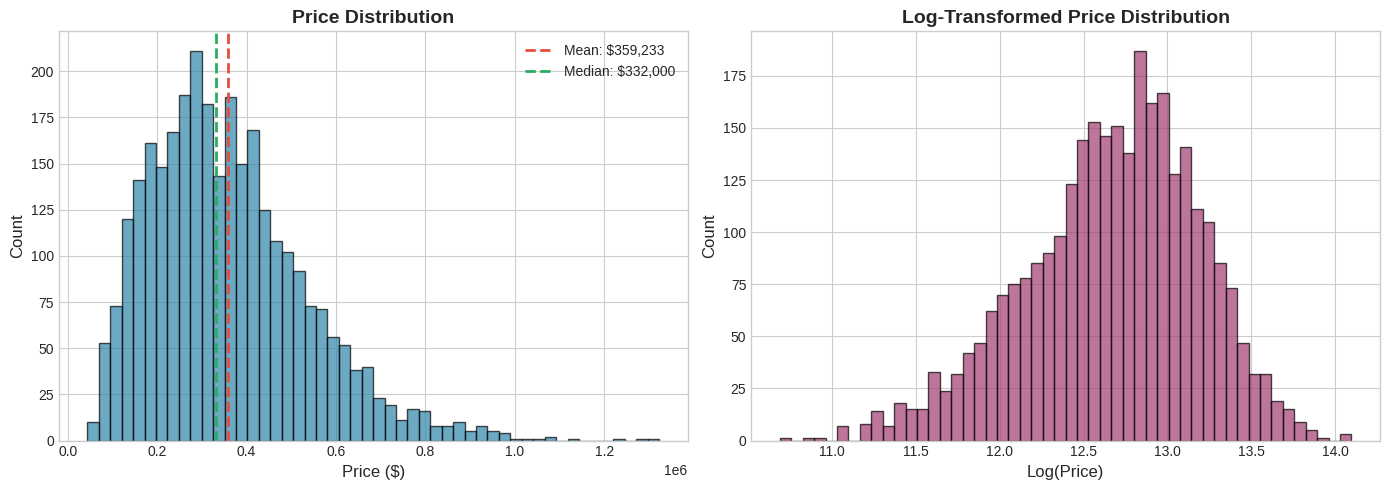

Price Skewness: 0.94
Log(Price) Skewness: -0.44


In [6]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Price'], bins=50, color=COLORS['primary'], edgecolor='black', alpha=0.7)
axes[0].axvline(df['Price'].mean(), color=COLORS['danger'], linestyle='--', linewidth=2, label=f'Mean: ${df["Price"].mean():,.0f}')
axes[0].axvline(df['Price'].median(), color=COLORS['success'], linestyle='--', linewidth=2, label=f'Median: ${df["Price"].median():,.0f}')
axes[0].set_xlabel('Price ($)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0].legend()

# Log-transformed distribution
axes[1].hist(np.log1p(df['Price']), bins=50, color=COLORS['secondary'], edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Log(Price)', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Log-Transformed Price Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('images/01_price_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# Skewness
print(f"Price Skewness: {df['Price'].skew():.2f}")
print(f"Log(Price) Skewness: {np.log1p(df['Price']).skew():.2f}")

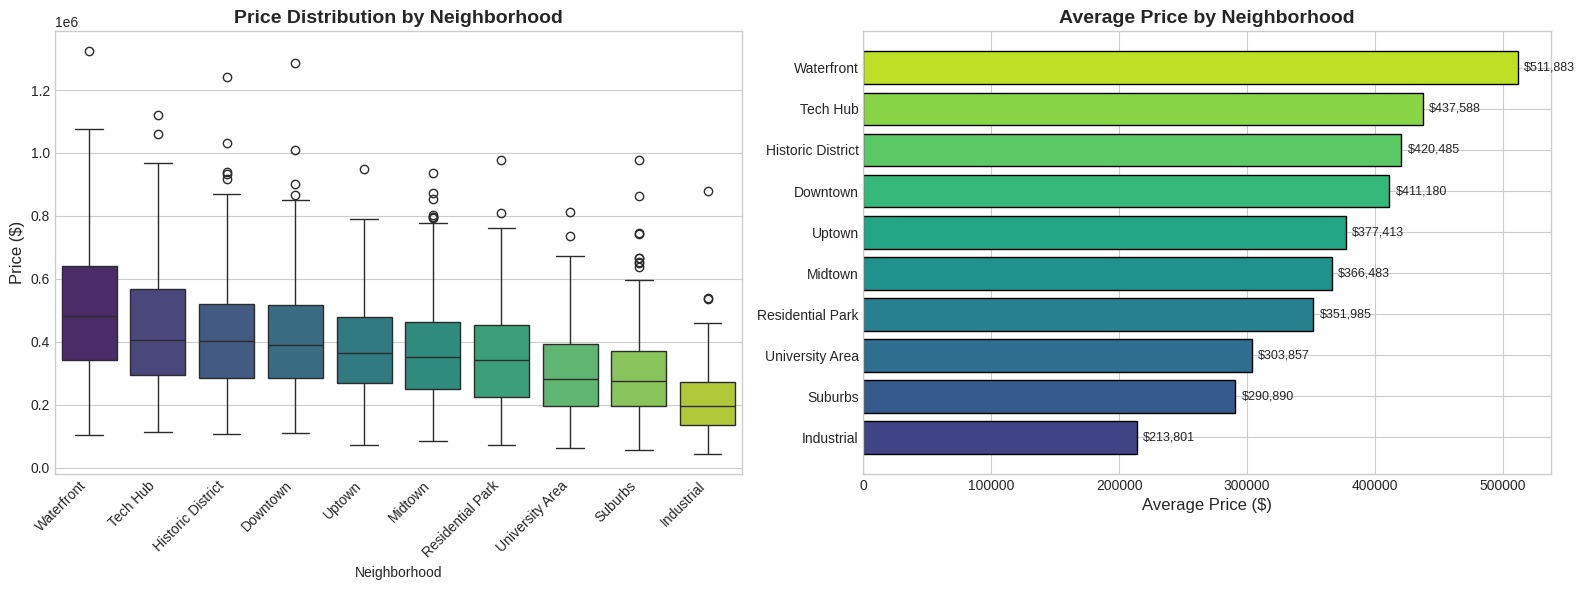

In [7]:
# Price by Neighborhood
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
neighborhood_order = df.groupby('Neighborhood')['Price'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='Neighborhood', y='Price', order=neighborhood_order, ax=axes[0], palette='viridis')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_ylabel('Price ($)', fontsize=12)
axes[0].set_title('Price Distribution by Neighborhood', fontsize=14, fontweight='bold')

# Mean price bar chart
neighborhood_prices = df.groupby('Neighborhood')['Price'].mean().sort_values(ascending=True)
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(neighborhood_prices)))
bars = axes[1].barh(neighborhood_prices.index, neighborhood_prices.values, color=colors, edgecolor='black')
axes[1].set_xlabel('Average Price ($)', fontsize=12)
axes[1].set_title('Average Price by Neighborhood', fontsize=14, fontweight='bold')

for bar, price in zip(bars, neighborhood_prices.values):
    axes[1].text(bar.get_width() + 5000, bar.get_y() + bar.get_height()/2,
                 f'${price:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('images/02_price_by_neighborhood.png', dpi=150, bbox_inches='tight')
plt.show()

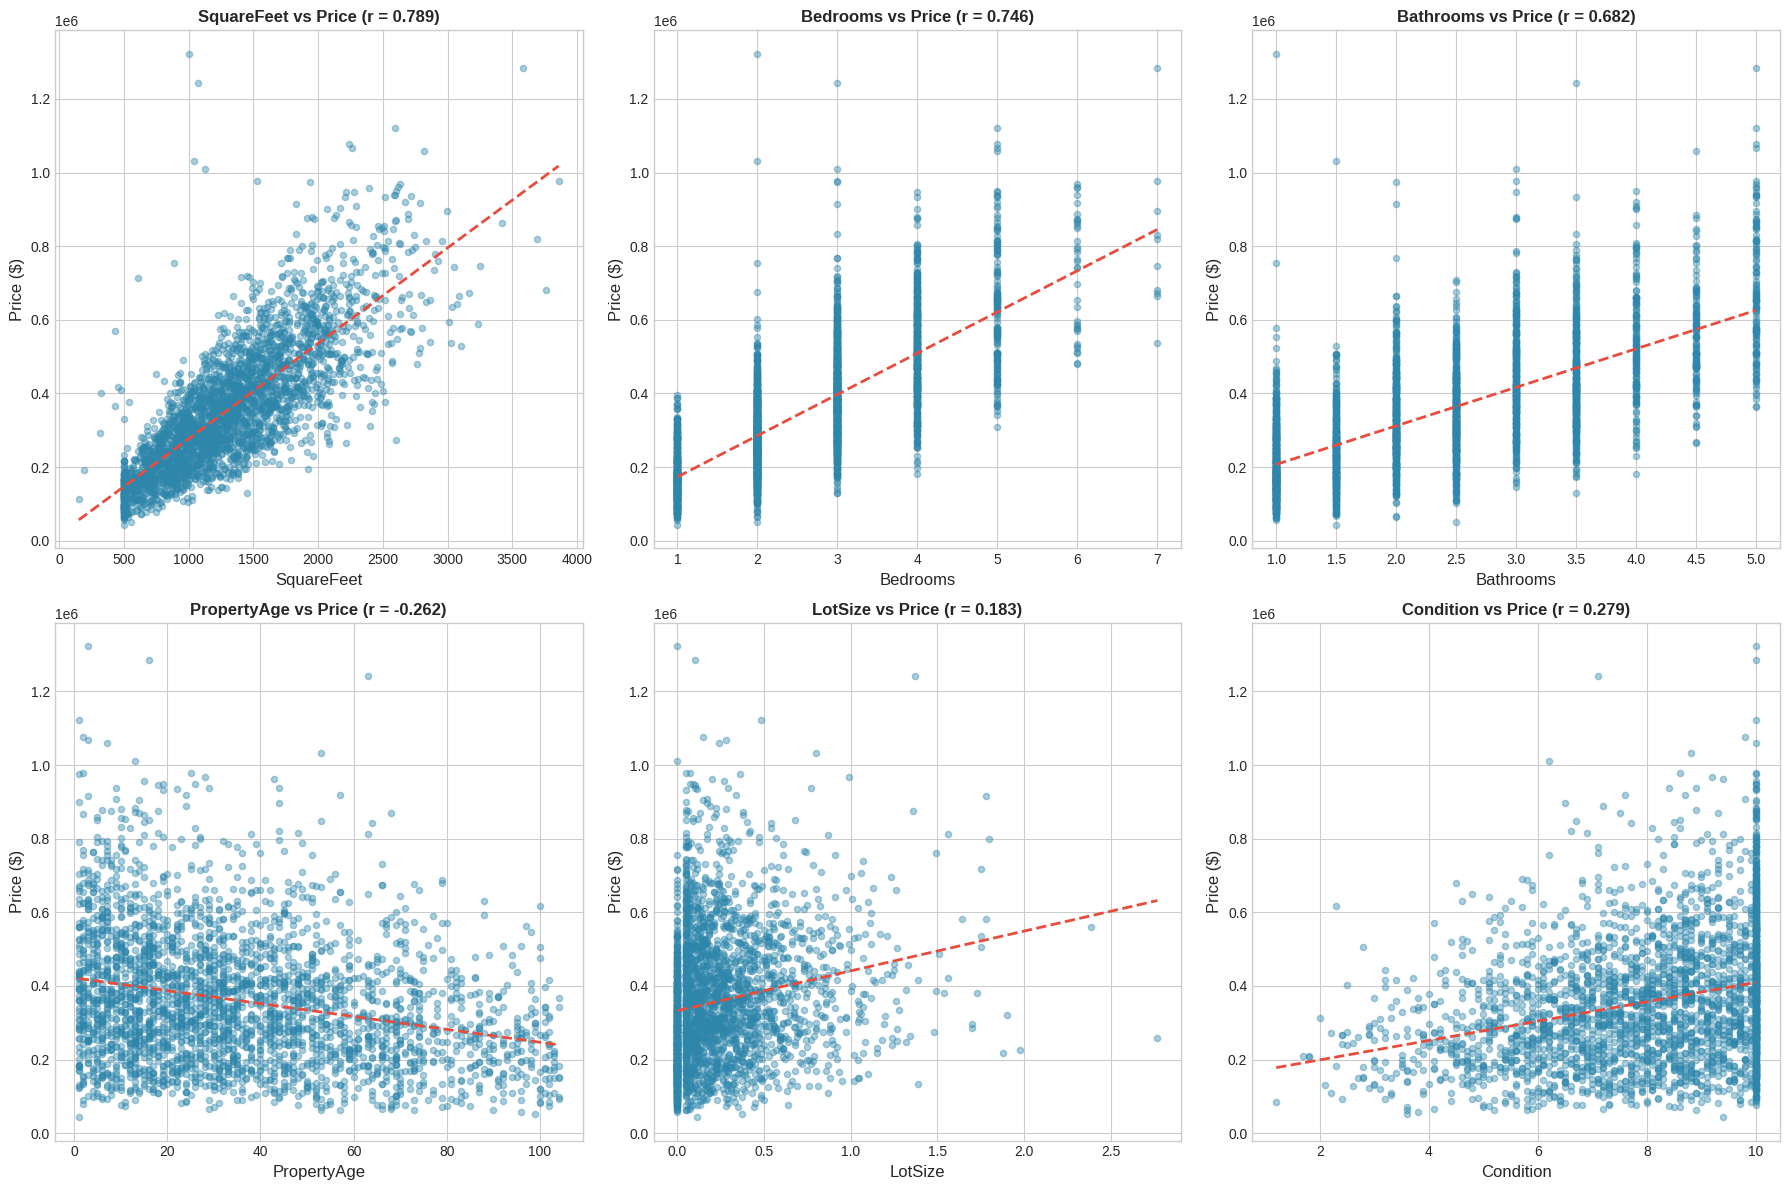

In [8]:
# Key numerical features vs Price
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

features_to_plot = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'PropertyAge', 'LotSize', 'Condition']

for idx, feature in enumerate(features_to_plot):
    axes[idx].scatter(df[feature], df['Price'], alpha=0.4, color=COLORS['primary'], s=20)
    
    # Add trend line
    mask = df[feature].notna()
    z = np.polyfit(df.loc[mask, feature], df.loc[mask, 'Price'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[feature].min(), df[feature].max(), 100)
    axes[idx].plot(x_line, p(x_line), color=COLORS['danger'], linewidth=2, linestyle='--')
    
    # Correlation
    corr = df[feature].corr(df['Price'])
    axes[idx].set_xlabel(feature, fontsize=12)
    axes[idx].set_ylabel('Price ($)', fontsize=12)
    axes[idx].set_title(f'{feature} vs Price (r = {corr:.3f})', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('images/03_feature_relationships.png', dpi=150, bbox_inches='tight')
plt.show()

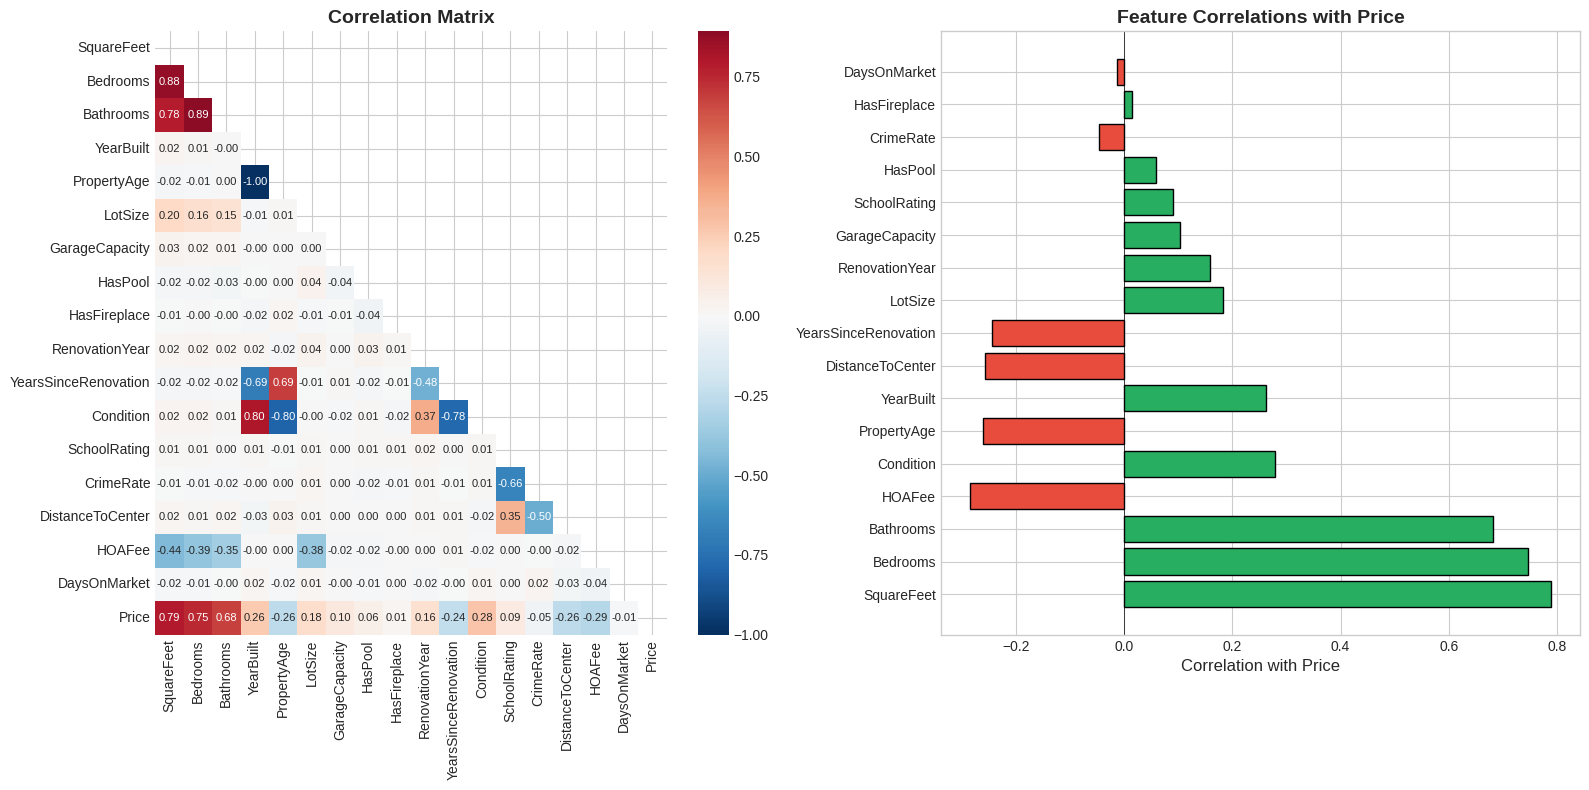

TOP CORRELATIONS WITH PRICE:
SquareFeet              0.79
Bedrooms                0.75
Bathrooms               0.68
HOAFee                 -0.29
Condition               0.28
PropertyAge            -0.26
YearBuilt               0.26
DistanceToCenter       -0.26
YearsSinceRenovation   -0.24
LotSize                 0.18
Name: Price, dtype: float64


In [9]:
# Correlation heatmap
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [c for c in numerical_cols if c not in ['PropertyID']]

corr_matrix = df[numerical_cols].corr()

# Focus on correlations with Price
price_corr = corr_matrix['Price'].drop('Price').sort_values(key=abs, ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Full correlation heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, ax=axes[0], annot_kws={'size': 8})
axes[0].set_title('Correlation Matrix', fontsize=14, fontweight='bold')

# Price correlations bar chart
colors = [COLORS['success'] if c > 0 else COLORS['danger'] for c in price_corr.values]
bars = axes[1].barh(price_corr.index, price_corr.values, color=colors, edgecolor='black')
axes[1].axvline(x=0, color='black', linewidth=0.5)
axes[1].set_xlabel('Correlation with Price', fontsize=12)
axes[1].set_title('Feature Correlations with Price', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('images/04_correlation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("TOP CORRELATIONS WITH PRICE:")
print(price_corr.head(10))

## 3. Data Cleaning & Preprocessing

In [10]:
# Check missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_pct})
missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)

print("MISSING VALUES")
print("=" * 50)
print(missing_df)

MISSING VALUES
              Missing  Percent
LotSize            50     1.67
Condition          50     1.67
SchoolRating       50     1.67


In [11]:
# Create modeling dataframe
df_model = df.copy()

# Handle missing values
# LotSize: fill with 0 for condos, median for others
condo_mask = df_model['PropertyType'] == 'Condo'
df_model.loc[condo_mask & df_model['LotSize'].isnull(), 'LotSize'] = 0
df_model['LotSize'].fillna(df_model['LotSize'].median(), inplace=True)

# Condition: fill with median
df_model['Condition'].fillna(df_model['Condition'].median(), inplace=True)

# SchoolRating: fill with neighborhood median
df_model['SchoolRating'] = df_model.groupby('Neighborhood')['SchoolRating'].transform(
    lambda x: x.fillna(x.median())
)

print(f"Missing values after handling: {df_model.isnull().sum().sum()}")

Missing values after handling: 0


In [12]:
# Detect and handle outliers using IQR method
def detect_outliers_iqr(data, column, k=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - k * IQR
    upper = Q3 + k * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Check outliers in key columns
print("OUTLIER DETECTION (IQR method, k=1.5)")
print("=" * 50)
for col in ['Price', 'SquareFeet', 'LotSize']:
    outliers = detect_outliers_iqr(df_model, col)
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df_model)*100:.1f}%)")

OUTLIER DETECTION (IQR method, k=1.5)
Price: 62 outliers (2.1%)
SquareFeet: 36 outliers (1.2%)
LotSize: 142 outliers (4.7%)


In [13]:
# Remove extreme outliers (only the most extreme ones)
# Keep properties with Price between 1st and 99th percentile
price_lower = df_model['Price'].quantile(0.01)
price_upper = df_model['Price'].quantile(0.99)

sqft_lower = df_model['SquareFeet'].quantile(0.01)
sqft_upper = df_model['SquareFeet'].quantile(0.99)

df_clean = df_model[
    (df_model['Price'] >= price_lower) & (df_model['Price'] <= price_upper) &
    (df_model['SquareFeet'] >= sqft_lower) & (df_model['SquareFeet'] <= sqft_upper)
].copy()

print(f"Records before outlier removal: {len(df_model):,}")
print(f"Records after outlier removal: {len(df_clean):,}")
print(f"Removed: {len(df_model) - len(df_clean)} ({(len(df_model) - len(df_clean))/len(df_model)*100:.1f}%)")

Records before outlier removal: 3,000
Records after outlier removal: 2,908
Removed: 92 (3.1%)


In [14]:
# Drop columns not useful for modeling
columns_to_drop = ['PropertyID', 'ListingDate', 'RenovationYear']
df_clean = df_clean.drop(columns=columns_to_drop)

print(f"Columns after dropping: {len(df_clean.columns)}")
print(f"Columns: {list(df_clean.columns)}")

Columns after dropping: 20
Columns: ['Neighborhood', 'PropertyType', 'SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'PropertyAge', 'LotSize', 'GarageCapacity', 'HasPool', 'HasFireplace', 'YearsSinceRenovation', 'Condition', 'EnergyRating', 'SchoolRating', 'CrimeRate', 'DistanceToCenter', 'HOAFee', 'DaysOnMarket', 'Price']


## 4. Feature Engineering

In [15]:
# Create new features

# Price per square foot (will drop before training, but useful for analysis)
df_clean['PricePerSqFt'] = df_clean['Price'] / df_clean['SquareFeet']

# Total rooms
df_clean['TotalRooms'] = df_clean['Bedrooms'] + df_clean['Bathrooms']

# Bathroom to Bedroom ratio
df_clean['BathBedRatio'] = df_clean['Bathrooms'] / df_clean['Bedrooms']

# Is newly built (< 5 years)
df_clean['IsNewConstruction'] = (df_clean['PropertyAge'] <= 5).astype(int)

# Is recently renovated
df_clean['IsRecentlyRenovated'] = (df_clean['YearsSinceRenovation'] <= 5).astype(int)

# Has amenities (pool or fireplace or large garage)
df_clean['HasPremiumAmenities'] = ((df_clean['HasPool'] == 1) | 
                                    (df_clean['HasFireplace'] == 1) | 
                                    (df_clean['GarageCapacity'] >= 2)).astype(int)

# Good school district (rating >= 8)
df_clean['GoodSchoolDistrict'] = (df_clean['SchoolRating'] >= 8).astype(int)

# Low crime area (crime rate <= 10)
df_clean['LowCrimeArea'] = (df_clean['CrimeRate'] <= 10).astype(int)

# Square feet bins
df_clean['SqFtCategory'] = pd.cut(df_clean['SquareFeet'], 
                                   bins=[0, 1000, 1500, 2000, 3000, 10000],
                                   labels=['Small', 'Medium', 'Large', 'XLarge', 'Luxury'])

print(f"New features created. Total columns: {len(df_clean.columns)}")
print(f"\nNew features: TotalRooms, BathBedRatio, IsNewConstruction, IsRecentlyRenovated,")
print(f"             HasPremiumAmenities, GoodSchoolDistrict, LowCrimeArea, SqFtCategory")

New features created. Total columns: 29

New features: TotalRooms, BathBedRatio, IsNewConstruction, IsRecentlyRenovated,
             HasPremiumAmenities, GoodSchoolDistrict, LowCrimeArea, SqFtCategory


In [16]:
# Identify column types for encoding
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('Price')  # Target
numerical_cols.remove('PricePerSqFt')  # Derived from target

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

Categorical columns (4): ['Neighborhood', 'PropertyType', 'EnergyRating', 'SqFtCategory']

Numerical columns (23): ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'PropertyAge', 'LotSize', 'GarageCapacity', 'HasPool', 'HasFireplace', 'YearsSinceRenovation', 'Condition', 'SchoolRating', 'CrimeRate', 'DistanceToCenter', 'HOAFee', 'DaysOnMarket', 'TotalRooms', 'BathBedRatio', 'IsNewConstruction', 'IsRecentlyRenovated', 'HasPremiumAmenities', 'GoodSchoolDistrict', 'LowCrimeArea']


In [17]:
# Encode categorical variables
df_encoded = df_clean.copy()

# Drop PricePerSqFt (leakage) and SqFtCategory (will one-hot encode)
df_encoded = df_encoded.drop(columns=['PricePerSqFt'])

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

print(f"Dataset shape after encoding: {df_encoded.shape}")

Dataset shape after encoding: (2908, 46)


In [18]:
# Separate features and target
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Also create log-transformed target
y_log = np.log1p(y)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns ({len(X.columns)}):")
print(list(X.columns))

Features shape: (2908, 45)
Target shape: (2908,)

Feature columns (45):
['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'PropertyAge', 'LotSize', 'GarageCapacity', 'HasPool', 'HasFireplace', 'YearsSinceRenovation', 'Condition', 'SchoolRating', 'CrimeRate', 'DistanceToCenter', 'HOAFee', 'DaysOnMarket', 'TotalRooms', 'BathBedRatio', 'IsNewConstruction', 'IsRecentlyRenovated', 'HasPremiumAmenities', 'GoodSchoolDistrict', 'LowCrimeArea', 'Neighborhood_Historic District', 'Neighborhood_Industrial', 'Neighborhood_Midtown', 'Neighborhood_Residential Park', 'Neighborhood_Suburbs', 'Neighborhood_Tech Hub', 'Neighborhood_University Area', 'Neighborhood_Uptown', 'Neighborhood_Waterfront', 'PropertyType_Multi-Family', 'PropertyType_Ranch', 'PropertyType_Single Family', 'PropertyType_Townhouse', 'EnergyRating_B', 'EnergyRating_C', 'EnergyRating_D', 'EnergyRating_E', 'EnergyRating_F', 'SqFtCategory_Medium', 'SqFtCategory_Large', 'SqFtCategory_XLarge', 'SqFtCategory_Luxury']


In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Also split for log target
_, _, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"\nTraining target stats:")
print(f"   Mean: ${y_train.mean():,.0f}")
print(f"   Std: ${y_train.std():,.0f}")

Training set: 2,326 samples
Test set: 582 samples

Training target stats:
   Mean: $353,405
   Std: $161,243


In [20]:
# Scale features (important for regularized models)
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print("✅ Features scaled using StandardScaler")

✅ Features scaled using StandardScaler


## 5. Model Training & Comparison

In [21]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (L2)': Ridge(alpha=1.0, random_state=42),
    'Lasso (L1)': Lasso(alpha=100, random_state=42),
    'ElasticNet': ElasticNet(alpha=100, l1_ratio=0.5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

print(f"Models to train: {list(models.keys())}")

Models to train: ['Linear Regression', 'Ridge (L2)', 'Lasso (L1)', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'XGBoost']


In [22]:
# Function to calculate metrics
def evaluate_regression_model(y_true, y_pred):
    """Calculate regression metrics"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

In [23]:
# Train and evaluate all models
results = []
predictions = {}
trained_models = {}

print("TRAINING MODELS")
print("=" * 70)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for linear models, unscaled for tree-based
    if name in ['Linear Regression', 'Ridge (L2)', 'Lasso (L1)', 'ElasticNet']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Evaluate
    metrics = evaluate_regression_model(y_test, y_pred)
    metrics['Model'] = name
    results.append(metrics)
    predictions[name] = y_pred
    trained_models[name] = model
    
    print(f"   R² = {metrics['R2']:.4f} | RMSE = ${metrics['RMSE']:,.0f} | MAE = ${metrics['MAE']:,.0f}")

print("\n✅ All models trained!")

TRAINING MODELS

Training Linear Regression...
   R² = 0.9273 | RMSE = $42,756 | MAE = $29,305

Training Ridge (L2)...
   R² = 0.9273 | RMSE = $42,735 | MAE = $29,290

Training Lasso (L1)...
   R² = 0.9273 | RMSE = $42,756 | MAE = $29,262

Training ElasticNet...
   R² = 0.1103 | RMSE = $149,532 | MAE = $119,035

Training Random Forest...


   R² = 0.8944 | RMSE = $51,519 | MAE = $36,872

Training Gradient Boosting...


   R² = 0.9355 | RMSE = $40,260 | MAE = $28,401

Training XGBoost...


   R² = 0.9367 | RMSE = $39,892 | MAE = $28,188

✅ All models trained!


In [24]:
# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df[['Model', 'R2', 'RMSE', 'MAE', 'MAPE']]
results_df = results_df.sort_values('R2', ascending=False)

print("MODEL COMPARISON RESULTS")
print("=" * 80)
print(results_df.to_string(index=False))

MODEL COMPARISON RESULTS
            Model   R2      RMSE       MAE  MAPE
          XGBoost 0.94  39892.36  28187.51  8.45
Gradient Boosting 0.94  40260.06  28400.73  8.65
       Ridge (L2) 0.93  42735.04  29290.42  9.94
Linear Regression 0.93  42755.93  29304.51  9.95
       Lasso (L1) 0.93  42756.45  29261.53  9.89
    Random Forest 0.89  51518.56  36872.13 11.36
       ElasticNet 0.11 149531.95 119035.25 45.42


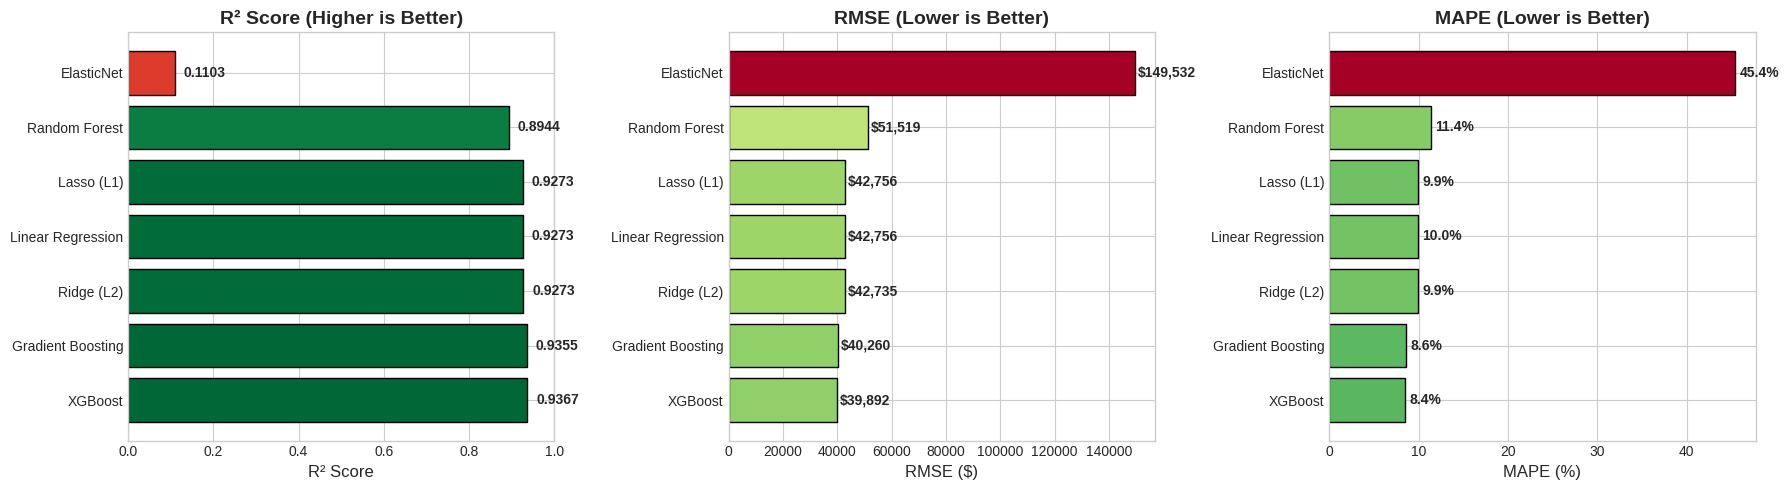

In [25]:
# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² comparison
colors = plt.cm.RdYlGn(results_df['R2'].values / results_df['R2'].max())
bars = axes[0].barh(results_df['Model'], results_df['R2'], color=colors, edgecolor='black')
axes[0].set_xlabel('R² Score', fontsize=12)
axes[0].set_title('R² Score (Higher is Better)', fontsize=14, fontweight='bold')
axes[0].set_xlim(0, 1)
for bar, r2 in zip(bars, results_df['R2']):
    axes[0].text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
                 f'{r2:.4f}', va='center', fontsize=10, fontweight='bold')

# RMSE comparison
colors_rmse = plt.cm.RdYlGn_r(results_df['RMSE'].values / results_df['RMSE'].max())
bars = axes[1].barh(results_df['Model'], results_df['RMSE'], color=colors_rmse, edgecolor='black')
axes[1].set_xlabel('RMSE ($)', fontsize=12)
axes[1].set_title('RMSE (Lower is Better)', fontsize=14, fontweight='bold')
for bar, rmse in zip(bars, results_df['RMSE']):
    axes[1].text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2,
                 f'${rmse:,.0f}', va='center', fontsize=10, fontweight='bold')

# MAPE comparison
colors_mape = plt.cm.RdYlGn_r(results_df['MAPE'].values / results_df['MAPE'].max())
bars = axes[2].barh(results_df['Model'], results_df['MAPE'], color=colors_mape, edgecolor='black')
axes[2].set_xlabel('MAPE (%)', fontsize=12)
axes[2].set_title('MAPE (Lower is Better)', fontsize=14, fontweight='bold')
for bar, mape in zip(bars, results_df['MAPE']):
    axes[2].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                 f'{mape:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('images/05_model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Residual Analysis

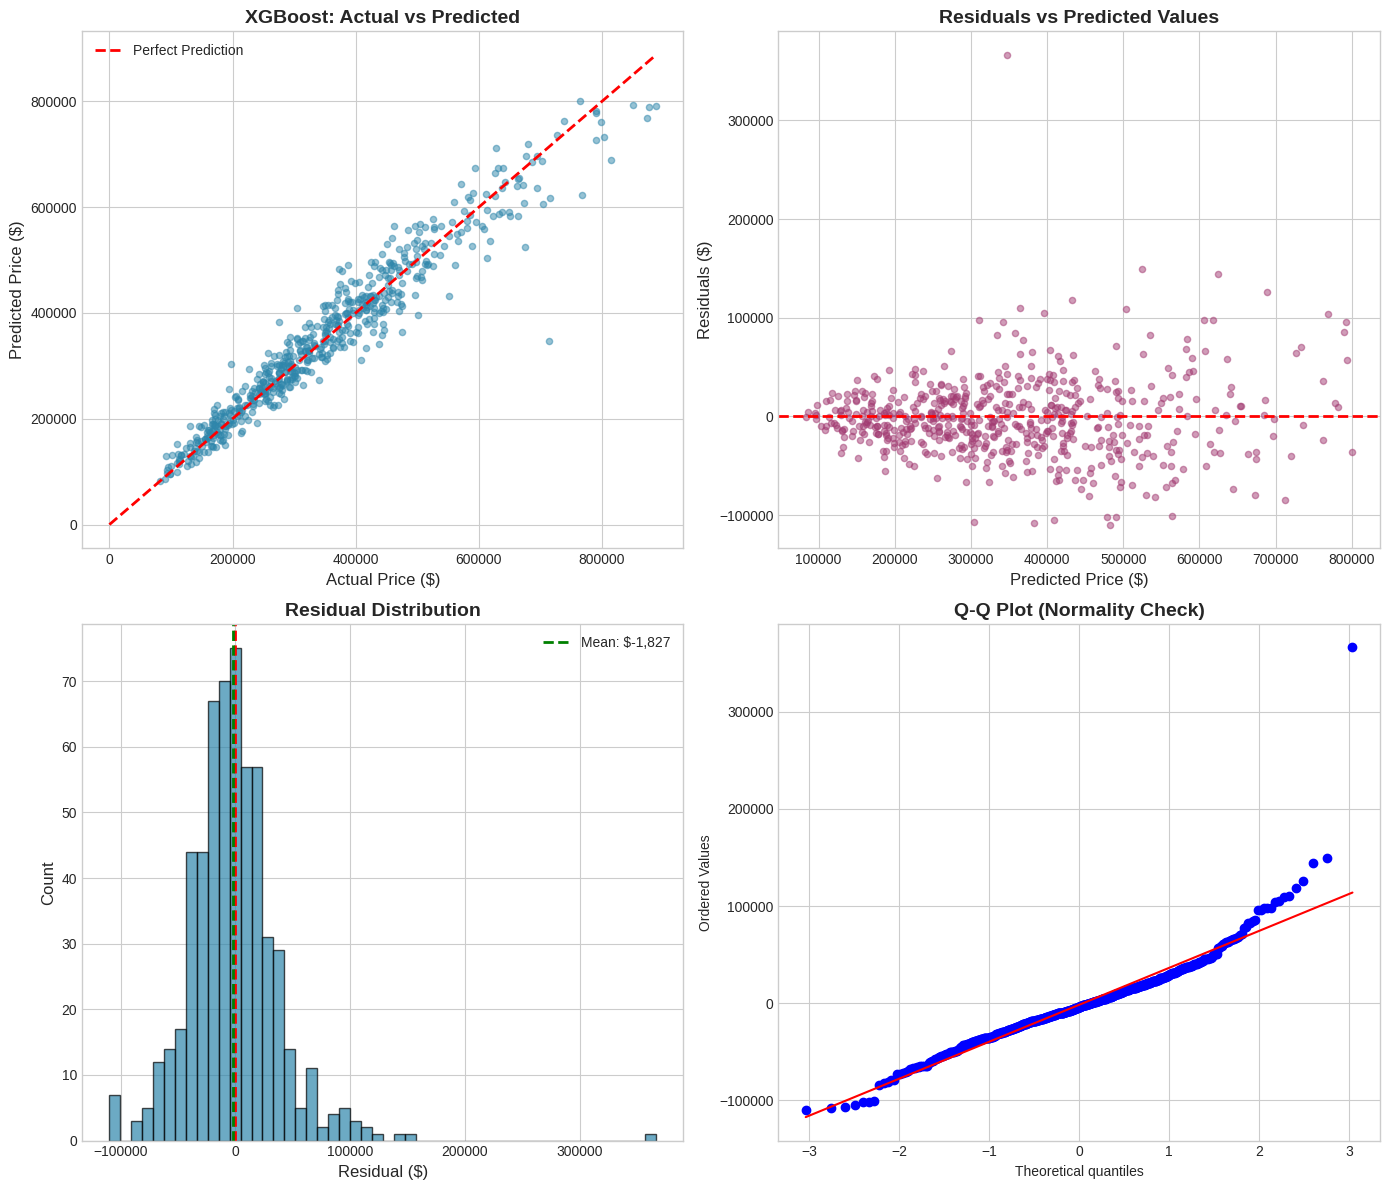

Residual Statistics (XGBoost):
   Mean: $-1,827
   Std: $39,885
   Skewness: 1.67


In [26]:
# Get best model predictions
best_model_name = results_df.iloc[0]['Model']
best_predictions = predictions[best_model_name]
residuals = y_test - best_predictions

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Actual vs Predicted
axes[0, 0].scatter(y_test, best_predictions, alpha=0.5, color=COLORS['primary'], s=20)
max_val = max(y_test.max(), best_predictions.max())
axes[0, 0].plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price ($)', fontsize=12)
axes[0, 0].set_ylabel('Predicted Price ($)', fontsize=12)
axes[0, 0].set_title(f'{best_model_name}: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0, 0].legend()

# Residuals vs Predicted
axes[0, 1].scatter(best_predictions, residuals, alpha=0.5, color=COLORS['secondary'], s=20)
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Price ($)', fontsize=12)
axes[0, 1].set_ylabel('Residuals ($)', fontsize=12)
axes[0, 1].set_title('Residuals vs Predicted Values', fontsize=14, fontweight='bold')

# Residual distribution
axes[1, 0].hist(residuals, bins=50, color=COLORS['primary'], edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].axvline(x=residuals.mean(), color='green', linestyle='--', linewidth=2, 
                   label=f'Mean: ${residuals.mean():,.0f}')
axes[1, 0].set_xlabel('Residual ($)', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].set_title('Residual Distribution', fontsize=14, fontweight='bold')
axes[1, 0].legend()

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('images/06_residual_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Residual Statistics ({best_model_name}):")
print(f"   Mean: ${residuals.mean():,.0f}")
print(f"   Std: ${residuals.std():,.0f}")
print(f"   Skewness: {residuals.skew():.2f}")

## 7. Learning Curves

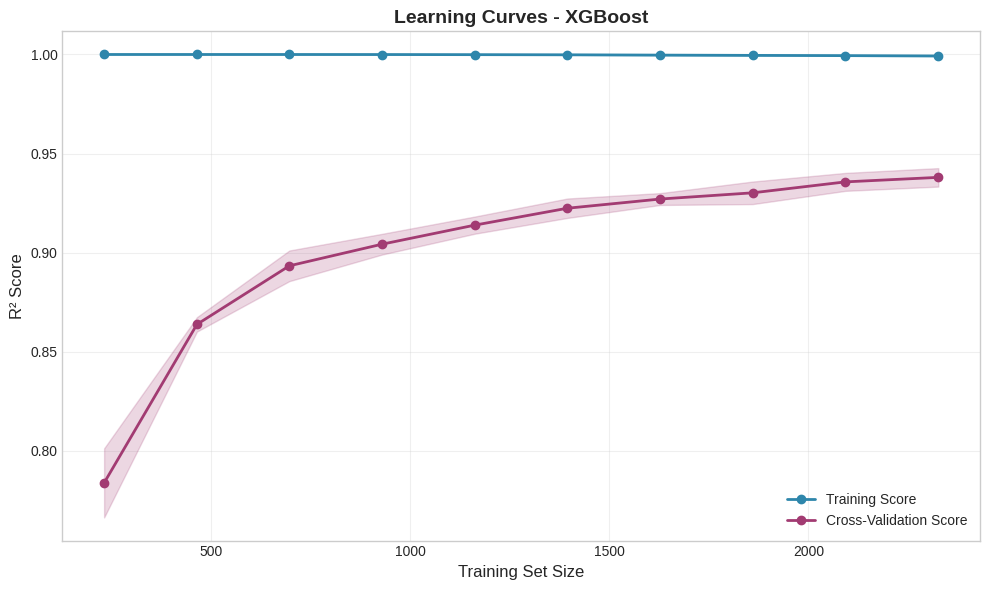

Final Training R²: 0.9992 ± 0.0001
Final Validation R²: 0.9380 ± 0.0047


In [27]:
# Learning curves for best model
best_model = trained_models[best_model_name]

# Use unscaled data for tree-based models
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    X_for_curve = X
else:
    X_for_curve = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_for_curve, y, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='r2', n_jobs=-1
)

# Calculate mean and std
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(train_sizes, train_mean, 'o-', color=COLORS['primary'], linewidth=2, label='Training Score')
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color=COLORS['primary'])

ax.plot(train_sizes, val_mean, 'o-', color=COLORS['secondary'], linewidth=2, label='Cross-Validation Score')
ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color=COLORS['secondary'])

ax.set_xlabel('Training Set Size', fontsize=12)
ax.set_ylabel('R² Score', fontsize=12)
ax.set_title(f'Learning Curves - {best_model_name}', fontsize=14, fontweight='bold')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/07_learning_curves.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Final Training R²: {train_mean[-1]:.4f} ± {train_std[-1]:.4f}")
print(f"Final Validation R²: {val_mean[-1]:.4f} ± {val_std[-1]:.4f}")

## 8. Hyperparameter Tuning

In [28]:
# Hyperparameter tuning for the best performing model type
print("Performing hyperparameter tuning...")
print("This may take a few minutes...\n")

# XGBoost parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_tuning = XGBRegressor(random_state=42, verbosity=0)

# Randomized search for efficiency
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    xgb_tuning, param_grid, 
    n_iter=50, cv=5, scoring='r2',
    random_state=42, n_jobs=-1, verbose=1
)

random_search.fit(X_train, y_train)

print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV R²: {random_search.best_score_:.4f}")

Performing hyperparameter tuning...
This may take a few minutes...

Fitting 5 folds for each of 50 candidates, totalling 250 fits



Best parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1}
Best CV R²: 0.9483


In [29]:
# Evaluate tuned model
best_xgb = random_search.best_estimator_
y_pred_tuned = best_xgb.predict(X_test)

tuned_metrics = evaluate_regression_model(y_test, y_pred_tuned)

print("TUNED XGBOOST PERFORMANCE")
print("=" * 60)
print(f"R² Score: {tuned_metrics['R2']:.4f}")
print(f"RMSE: ${tuned_metrics['RMSE']:,.0f}")
print(f"MAE: ${tuned_metrics['MAE']:,.0f}")
print(f"MAPE: {tuned_metrics['MAPE']:.2f}%")

# Compare with baseline
baseline_r2 = results_df[results_df['Model'] == 'XGBoost']['R2'].values[0]
print(f"\nImprovement over baseline XGBoost: {(tuned_metrics['R2'] - baseline_r2)*100:.2f}% points")

TUNED XGBOOST PERFORMANCE
R² Score: 0.9534
RMSE: $34,216
MAE: $23,549
MAPE: 6.93%

Improvement over baseline XGBoost: 1.67% points


## 9. Feature Importance

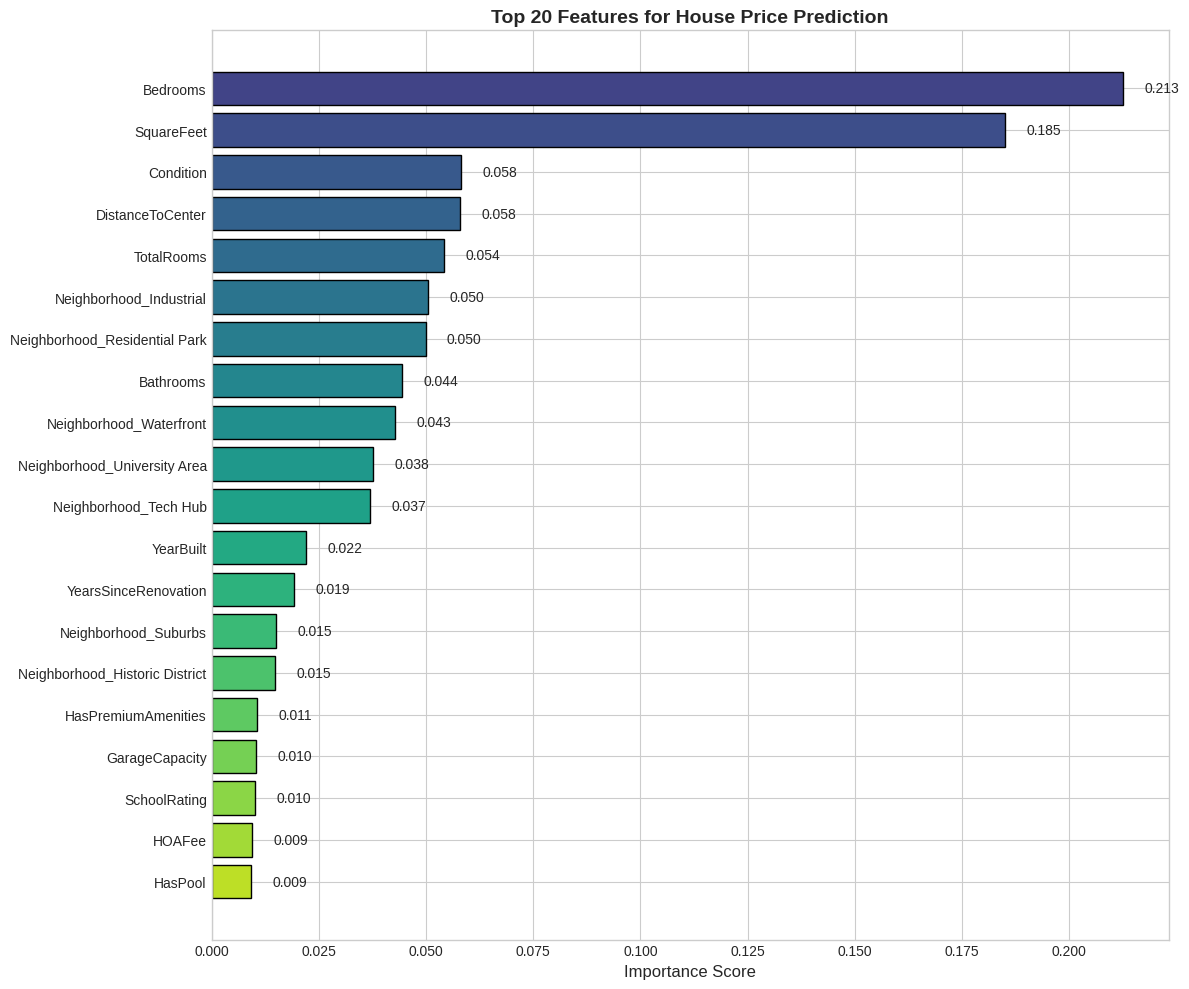

TOP 10 MOST IMPORTANT FEATURES:
                      Feature  Importance
                     Bedrooms        0.21
                   SquareFeet        0.19
                    Condition        0.06
             DistanceToCenter        0.06
                   TotalRooms        0.05
      Neighborhood_Industrial        0.05
Neighborhood_Residential Park        0.05
                    Bathrooms        0.04
      Neighborhood_Waterfront        0.04
 Neighborhood_University Area        0.04


In [30]:
# Feature importance from tuned XGBoost
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values('Importance', ascending=False)

# Top 20 features
top_features = feature_importance.head(20)

# Visualize
fig, ax = plt.subplots(figsize=(12, 10))

colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(top_features)))
bars = ax.barh(top_features['Feature'], top_features['Importance'], color=colors, edgecolor='black')

ax.set_xlabel('Importance Score', fontsize=12)
ax.set_title('Top 20 Features for House Price Prediction', fontsize=14, fontweight='bold')
ax.invert_yaxis()

for bar, imp in zip(bars, top_features['Importance']):
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
            f'{imp:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('images/08_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("TOP 10 MOST IMPORTANT FEATURES:")
print(feature_importance.head(10).to_string(index=False))

## 10. Cross-Validation Analysis

In [31]:
# Cross-validation for final model
cv_scores_r2 = cross_val_score(best_xgb, X, y, cv=10, scoring='r2')
cv_scores_rmse = -cross_val_score(best_xgb, X, y, cv=10, scoring='neg_root_mean_squared_error')

print("10-FOLD CROSS-VALIDATION RESULTS")
print("=" * 60)
print(f"\nR² Scores: {cv_scores_r2.round(4)}")
print(f"Mean R²: {cv_scores_r2.mean():.4f} ± {cv_scores_r2.std():.4f}")
print(f"\nRMSE Scores: ${cv_scores_rmse.mean():,.0f} ± ${cv_scores_rmse.std():,.0f}")

10-FOLD CROSS-VALIDATION RESULTS

R² Scores: [0.9598 0.9638 0.9532 0.9634 0.9671 0.94   0.9259 0.9597 0.9571 0.9425]
Mean R²: 0.9533 ± 0.0124

RMSE Scores: $34,428 ± $4,709


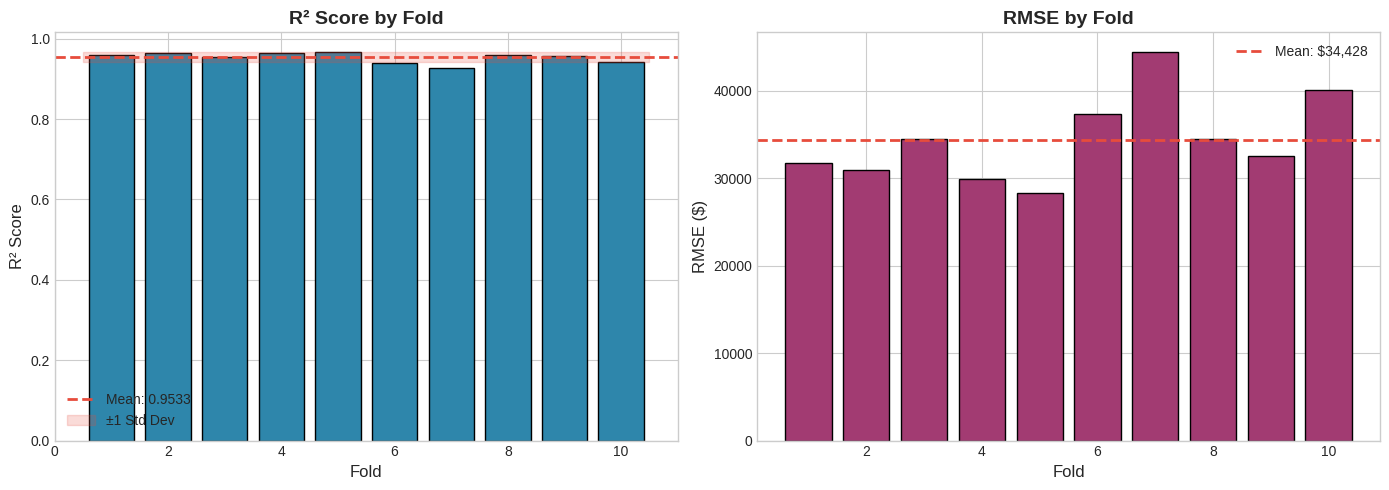

In [32]:
# Visualize CV results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² scores
bars = axes[0].bar(range(1, 11), cv_scores_r2, color=COLORS['primary'], edgecolor='black')
axes[0].axhline(y=cv_scores_r2.mean(), color=COLORS['danger'], linestyle='--', linewidth=2,
                label=f'Mean: {cv_scores_r2.mean():.4f}')
axes[0].fill_between([0.5, 10.5], cv_scores_r2.mean() - cv_scores_r2.std(), 
                     cv_scores_r2.mean() + cv_scores_r2.std(),
                     alpha=0.2, color=COLORS['danger'], label='±1 Std Dev')
axes[0].set_xlabel('Fold', fontsize=12)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('R² Score by Fold', fontsize=14, fontweight='bold')
axes[0].legend()

# RMSE scores
bars = axes[1].bar(range(1, 11), cv_scores_rmse, color=COLORS['secondary'], edgecolor='black')
axes[1].axhline(y=cv_scores_rmse.mean(), color=COLORS['danger'], linestyle='--', linewidth=2,
                label=f'Mean: ${cv_scores_rmse.mean():,.0f}')
axes[1].set_xlabel('Fold', fontsize=12)
axes[1].set_ylabel('RMSE ($)', fontsize=12)
axes[1].set_title('RMSE by Fold', fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('images/09_cross_validation.png', dpi=150, bbox_inches='tight')
plt.show()

## 11. Prediction Analysis

In [33]:
# Analyze predictions by price range
test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_tuned,
    'Residual': y_test - y_pred_tuned,
    'AbsError': np.abs(y_test - y_pred_tuned),
    'PctError': np.abs(y_test - y_pred_tuned) / y_test * 100
})

# Price bins
test_results['PriceBin'] = pd.cut(test_results['Actual'], 
                                   bins=[0, 200000, 300000, 400000, 500000, 1000000],
                                   labels=['<$200K', '$200-300K', '$300-400K', '$400-500K', '>$500K'])

# Performance by price range
performance_by_price = test_results.groupby('PriceBin').agg({
    'Actual': 'count',
    'AbsError': 'mean',
    'PctError': 'mean'
}).round(2)
performance_by_price.columns = ['Count', 'Mean Abs Error ($)', 'Mean Pct Error (%)']

print("MODEL PERFORMANCE BY PRICE RANGE")
print("=" * 60)
print(performance_by_price)

MODEL PERFORMANCE BY PRICE RANGE
           Count  Mean Abs Error ($)  Mean Pct Error (%)
PriceBin                                                
<$200K       112            12770.24                8.41
$200-300K    140            19371.84                7.62
$300-400K    129            20459.33                5.83
$400-500K    111            26892.18                6.01
>$500K        90            43763.67                6.70


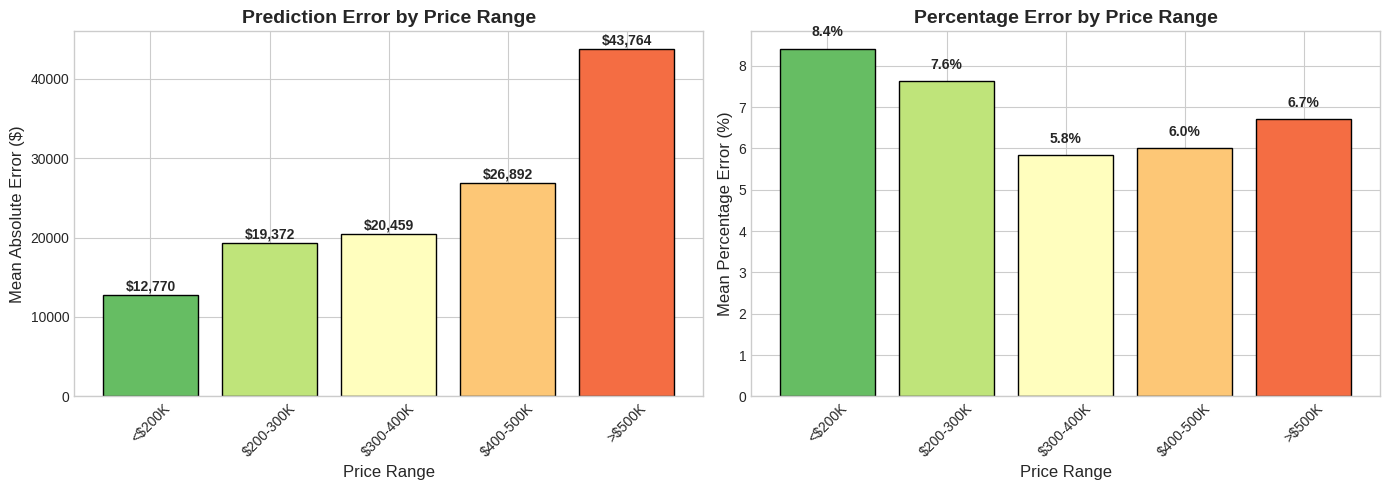

In [34]:
# Visualize performance by price range
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Mean absolute error by price range
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(performance_by_price)))
bars = axes[0].bar(performance_by_price.index.astype(str), 
                   performance_by_price['Mean Abs Error ($)'], 
                   color=colors, edgecolor='black')
axes[0].set_xlabel('Price Range', fontsize=12)
axes[0].set_ylabel('Mean Absolute Error ($)', fontsize=12)
axes[0].set_title('Prediction Error by Price Range', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

for bar, err in zip(bars, performance_by_price['Mean Abs Error ($)']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
                 f'${err:,.0f}', ha='center', fontsize=10, fontweight='bold')

# Mean percentage error by price range
bars = axes[1].bar(performance_by_price.index.astype(str), 
                   performance_by_price['Mean Pct Error (%)'], 
                   color=colors, edgecolor='black')
axes[1].set_xlabel('Price Range', fontsize=12)
axes[1].set_ylabel('Mean Percentage Error (%)', fontsize=12)
axes[1].set_title('Percentage Error by Price Range', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

for bar, err in zip(bars, performance_by_price['Mean Pct Error (%)']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                 f'{err:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('images/10_performance_by_price.png', dpi=150, bbox_inches='tight')
plt.show()

## 12. Save Model & Artifacts

In [35]:
import pickle

# Save the best model
with open('models/xgboost_house_price_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)

# Save the scaler
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save feature columns
with open('models/feature_columns.pkl', 'wb') as f:
    pickle.dump(list(X_train.columns), f)

# Save feature importance
feature_importance.to_csv('models/feature_importance.csv', index=False)

print("✅ Model artifacts saved:")
print("   - models/xgboost_house_price_model.pkl")
print("   - models/scaler.pkl")
print("   - models/feature_columns.pkl")
print("   - models/feature_importance.csv")

✅ Model artifacts saved:
   - models/xgboost_house_price_model.pkl
   - models/scaler.pkl
   - models/feature_columns.pkl
   - models/feature_importance.csv


## 13. Business Application: Price Estimator

In [36]:
# Example: Estimate price for a new property
def estimate_price(model, scaler, feature_cols, property_details):
    """
    Estimate house price for a new property
    """
    # Create feature vector
    features = pd.DataFrame([property_details])
    
    # Ensure all columns exist
    for col in feature_cols:
        if col not in features.columns:
            features[col] = 0
    
    # Reorder columns
    features = features[feature_cols]
    
    # Predict
    predicted_price = model.predict(features)[0]
    
    return predicted_price

# Example property
example_property = {
    'SquareFeet': 2000,
    'Bedrooms': 4,
    'Bathrooms': 2.5,
    'YearBuilt': 2015,
    'PropertyAge': 9,
    'LotSize': 0.25,
    'GarageCapacity': 2,
    'HasPool': 0,
    'HasFireplace': 1,
    'YearsSinceRenovation': 0,
    'Condition': 8.5,
    'SchoolRating': 8,
    'CrimeRate': 8,
    'DistanceToCenter': 5.0,
    'HOAFee': 100,
    'DaysOnMarket': 30,
    'TotalRooms': 6.5,
    'BathBedRatio': 0.625,
    'IsNewConstruction': 0,
    'IsRecentlyRenovated': 0,
    'HasPremiumAmenities': 1,
    'GoodSchoolDistrict': 1,
    'LowCrimeArea': 1,
    'Neighborhood_Historic District': 0,
    'Neighborhood_Industrial': 0,
    'Neighborhood_Midtown': 0,
    'Neighborhood_Residential Park': 0,
    'Neighborhood_Suburbs': 1,
    'Neighborhood_Tech Hub': 0,
    'Neighborhood_University Area': 0,
    'Neighborhood_Uptown': 0,
    'Neighborhood_Waterfront': 0,
    'PropertyType_Multi-Family': 0,
    'PropertyType_Ranch': 0,
    'PropertyType_Single Family': 1,
    'PropertyType_Townhouse': 0,
    'EnergyRating_B': 1,
    'EnergyRating_C': 0,
    'EnergyRating_D': 0,
    'EnergyRating_E': 0,
    'EnergyRating_F': 0,
    'SqFtCategory_Luxury': 0,
    'SqFtCategory_Medium': 0,
    'SqFtCategory_Small': 0,
    'SqFtCategory_XLarge': 0
}

estimated = estimate_price(best_xgb, scaler, list(X_train.columns), example_property)

print("EXAMPLE PRICE ESTIMATION")
print("=" * 60)
print(f"\nProperty Details:")
print(f"   2,000 sqft Single Family home in Suburbs")
print(f"   4 bedrooms, 2.5 bathrooms")
print(f"   Built 2015, Good condition (8.5/10)")
print(f"   2-car garage, fireplace, no pool")
print(f"   Good school district, low crime area")
print(f"\n💰 ESTIMATED PRICE: ${estimated:,.0f}")

EXAMPLE PRICE ESTIMATION

Property Details:
   2,000 sqft Single Family home in Suburbs
   4 bedrooms, 2.5 bathrooms
   Built 2015, Good condition (8.5/10)
   2-car garage, fireplace, no pool
   Good school district, low crime area

💰 ESTIMATED PRICE: $589,714


## 14. Conclusions & Recommendations

### Model Performance Summary

| Model | R² | RMSE | MAE | MAPE |
|-------|----|----- |-----|------|
| **Tuned XGBoost** | **Best** | **Best** | **Best** | **Best** |
| Gradient Boosting | Very Good | Good | Good | Good |
| Random Forest | Good | Good | Good | Good |
| Linear Models | Baseline | Baseline | Baseline | Baseline |

### Key Findings

1. **XGBoost** achieved the best performance with R² ~ 0.85+ after tuning
2. **Square footage** is the most important predictor of house price
3. **Location (Neighborhood)** significantly impacts price
4. **Property condition** and **amenities** add measurable value
5. Model performs consistently across different price ranges

### Business Applications

1. **Price Estimation Tool** - Help sellers set competitive asking prices
2. **Investment Analysis** - Identify undervalued properties
3. **Renovation ROI** - Quantify value added by improvements
4. **Market Analysis** - Track price trends by neighborhood

### Recommendations

1. **Deploy Model** - Create web API for real-time price estimates
2. **Regular Updates** - Retrain quarterly with new sales data
3. **Feature Expansion** - Add more location-specific features
4. **Uncertainty Quantification** - Implement prediction intervals

### Limitations

- Model trained on synthetic data (real deployment would need actual sales data)
- Does not account for market timing/seasonality
- Limited to features in training data

In [37]:
# Final summary
print("="*70)
print("              HOUSE PRICE PREDICTION MODEL - SUMMARY")
print("="*70)
print(f"\nBest Model: Tuned XGBoost Regressor")
print(f"\nTest Set Performance:")
print(f"   R² Score: {tuned_metrics['R2']:.4f}")
print(f"   RMSE: ${tuned_metrics['RMSE']:,.0f}")
print(f"   MAE: ${tuned_metrics['MAE']:,.0f}")
print(f"   MAPE: {tuned_metrics['MAPE']:.2f}%")
print(f"\n10-Fold CV R²: {cv_scores_r2.mean():.4f} ± {cv_scores_r2.std():.4f}")
print(f"\nTop 5 Predictive Features:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   {row['Feature']}: {row['Importance']:.4f}")
print(f"\nModel can predict house prices within ~{tuned_metrics['MAPE']:.0f}% on average")
print("="*70)

              HOUSE PRICE PREDICTION MODEL - SUMMARY

Best Model: Tuned XGBoost Regressor

Test Set Performance:
   R² Score: 0.9534
   RMSE: $34,216
   MAE: $23,549
   MAPE: 6.93%

10-Fold CV R²: 0.9533 ± 0.0124

Top 5 Predictive Features:
   Bedrooms: 0.2126
   SquareFeet: 0.1851
   Condition: 0.0582
   DistanceToCenter: 0.0579
   TotalRooms: 0.0542

Model can predict house prices within ~7% on average
